A comparison of the median separation distance between different runs
1. CAC opendrift
2. Hourly vs daily opendrift
3. Ariane vs Opendrift hourly

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
import seawater as sw
import datetime
%matplotlib inline

C:\Users\SOONTIENSN\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text))


In [2]:
od_hourly = xr.open_dataset(r"C:/Users/SOONTIENSN/Documents/Research/Talks and Posters/Conferences/AMOP June 2020/Data/ciopse_od_hourly/output/sndist_od_2016070100_P31D.nc")
ariane_hourly = xr.open_dataset(r"C:/Users/SOONTIENSN/Documents/Research/Talks and Posters/Conferences/AMOP June 2020/Data/ciopse_ariane_hourly/output/sndist_ar_2016070100_P31D.nc")
interp_c = xr.open_dataset(r"C:/Users/SOONTIENSN/Documents/Research/Talks and Posters/Conferences/AMOP June 2020/Data/interp-cgrid-opendrift/output/sndist_od_2016070100_P31D.nc")
orig_c = xr.open_dataset(r"C:/Users/SOONTIENSN/Documents/Research/Talks and Posters/Conferences/AMOP June 2020/Data/orig-cgrid-opendrift/output/sndist_od_2016070100_P31D.nc")
od_daily=xr.open_dataset(r"C:/Users/SOONTIENSN/Documents/Research/Talks and Posters/Conferences/AMOP June 2020/Data/ciopse_od_daily/output/sndist_od_2016070100_P31D.nc")
ariane_daily=xr.open_dataset(r"C:/Users/SOONTIENSN/Documents/Research/Talks and Posters/Conferences/AMOP June 2020/Data/ciopse_ariane_daily/output/sndist_ar_2016070100_P31D.nc")

Distance for CAC

In [3]:
start = datetime.datetime(2016,7,1)
dates = [start + datetime.timedelta(days=n) for n in range(31)]
dates.append(interp_c.time.values[-1])
dist_CAC = np.zeros((interp_c.mod_lon.shape[0],len(dates)))
mask= np.zeros((interp_c.mod_lon.shape[0],len(dates)))
for n, d in enumerate(dates):
    interp_c_sel = interp_c.sel(time=d)
    orig_c_sel = orig_c.sel(time=d)
    for p in range(dist_CAC.shape[0]):
        lat = np.array([interp_c_sel.mod_lat.values[p], orig_c_sel.mod_lat.values[p]])
        lon = np.array([interp_c_sel.mod_lon.values[p], orig_c_sel.mod_lon.values[p]])
        mask[p,n] = np.ma.masked_invalid(lon[0]).mask
        dist_CAC[p, n] = sw.dist(lat,lon)[0] # distance defualts in km


C:\Users\SOONTIENSN\AppData\Local\Continuum\anaconda3\lib\site-packages\seawater\extras.py:73: RuntimeWarning: invalid value encountered in greater
  if np.any(np.abs(dlon) > 180):


In [4]:
dist_CAC = np.ma.masked_array(dist_CAC,mask)


In [5]:
(dist_CAC.mask == False).all()

False

Distance for hourly vs daily

In [6]:
start = datetime.datetime(2016,7,1)
dates = [start + datetime.timedelta(days=n) for n in range(31)]
dates.append(od_daily.time.values[-1])
dist_HD = np.zeros((od_daily.mod_lon.shape[0],len(dates)))
for n, d in enumerate(dates):
    od_daily_sel = od_daily.sel(time=d)
    od_hourly_sel = od_hourly.sel(time=d)
    for p in range(dist_HD.shape[0]):
        lat = np.array([od_daily_sel.mod_lat.values[p], od_hourly_sel.mod_lat.values[p]])
        lon = np.array([od_daily_sel.mod_lon.values[p], od_hourly_sel.mod_lon.values[p]])
        dist_HD[p, n] = sw.dist(lat,lon)[0] # distance defualts in km

C:\Users\SOONTIENSN\AppData\Local\Continuum\anaconda3\lib\site-packages\seawater\extras.py:73: RuntimeWarning: invalid value encountered in greater
  if np.any(np.abs(dlon) > 180):


In [7]:
dist_HD = np.ma.masked_array(dist_HD,mask=mask)

In [8]:
(dist_HD.mask == False).all()

False

Distance for OD vs Araine (hourly)

In [9]:
start = datetime.datetime(2016,7,1)
dates = [start + datetime.timedelta(days=n) for n in range(31)]
dates.append(od_daily.time.values[-1])
dist_AO = np.zeros((od_hourly.mod_lon.shape[0],len(dates)))
for n, d in enumerate(dates):
    ariane_hourly_sel = ariane_hourly.sel(time=d)
    od_hourly_sel = od_hourly.sel(time=d)
    for p in range(dist_AO.shape[0]):
        lat = np.array([ariane_hourly_sel.mod_lat.values[p], od_hourly_sel.mod_lat.values[p]])
        lon = np.array([ariane_hourly_sel.mod_lon.values[p], od_hourly_sel.mod_lon.values[p]])
        dist_AO[p, n] = sw.dist(lat,lon)[0] # distance defualts in km

C:\Users\SOONTIENSN\AppData\Local\Continuum\anaconda3\lib\site-packages\seawater\extras.py:73: RuntimeWarning: invalid value encountered in greater
  if np.any(np.abs(dlon) > 180):


In [10]:
dist_AO = np.ma.masked_array(dist_AO,mask=mask)

In [11]:
start = datetime.datetime(2016,7,1)
dates = [start + datetime.timedelta(days=n) for n in range(31)]
dates.append(od_daily.time.values[-1])
dist_AO_daily = np.zeros((od_daily.mod_lon.shape[0],len(dates)))
for n, d in enumerate(dates):
    ariane_daily_sel = ariane_daily.sel(time=d)
    od_daily_sel = od_daily.sel(time=d)
    for p in range(dist_AO_daily.shape[0]):
        lat = np.array([ariane_daily_sel.mod_lat.values[p], od_daily_sel.mod_lat.values[p]])
        lon = np.array([ariane_daily_sel.mod_lon.values[p], od_daily_sel.mod_lon.values[p]])
        dist_AO_daily[p, n] = sw.dist(lat,lon)[0] # distance defualts in km

C:\Users\SOONTIENSN\AppData\Local\Continuum\anaconda3\lib\site-packages\seawater\extras.py:73: RuntimeWarning: invalid value encountered in greater
  if np.any(np.abs(dlon) > 180):


In [12]:
dist_AO_daily = np.ma.masked_array(dist_AO_daily,mask=mask)

[ 0.          0.19703183  0.33880807  0.52420361  0.69111359  0.94916809
  1.07767174  1.34095752  1.57991946  1.85366288  2.40427321  2.89607835
  3.08455604  3.62462139  4.23040354  5.51856887  6.136778    6.72922969
  8.04696012  9.22129869  9.77386832 12.10726953 14.71572208 15.40201139
 17.37297249 20.63997507 21.99265862 21.52699518 24.48931408 27.28099155
 30.44653893 32.88433933] [0.         0.05223321 0.08333039 0.11086164 0.13543251 0.15259819
 0.19327972 0.22252291 0.25338937 0.29212099 0.3393525  0.3702511
 0.41742104 0.43047622 0.48522772 0.53393635 0.56742004 0.58054563
 0.62315497 0.68770877 0.76287687 0.90730236 0.92844339 1.01476213
 1.12157696 1.17325816 1.27944005 1.35957155 1.41621906 1.43731949
 1.57266951 1.6877543 ]
[ 0.          5.13257635  7.22855949  8.55541182 11.60234833 13.00419426
 14.72372675 17.27848053 19.82153749 21.66811609 25.59866238 27.42375946
 29.59541273 33.57266808 36.51446342 37.38814068 42.4161129  48.04784775
 54.34120464 56.10481644 57.0225

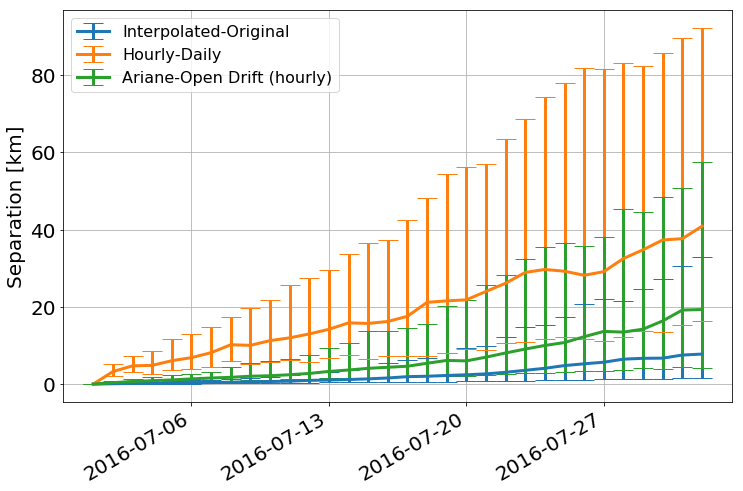

In [13]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_ylabel('Separation [km]', fontsize=20)
for dist, label in zip([dist_CAC, dist_HD, dist_AO], ['Interpolated-Original', 'Hourly-Daily', 'Ariane-Open Drift (hourly)']):
    median = np.nanmedian(np.ma.filled(dist,np.nan), axis=0)
    upper = np.nanquantile(np.ma.filled(dist,np.nan), 0.75, axis=0)
    lower = np.nanquantile(np.ma.filled(dist,np.nan), 0.25, axis=0)
    print(upper,lower)
    ax.errorbar(dates, median, yerr=[median-lower, upper-median], label=label, capsize=10,lw=3)
    
ax.grid()

ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=20)
fig.autofmt_xdate()
fig.savefig('figures/summary_errorbars.png',bbox_inches='tight')

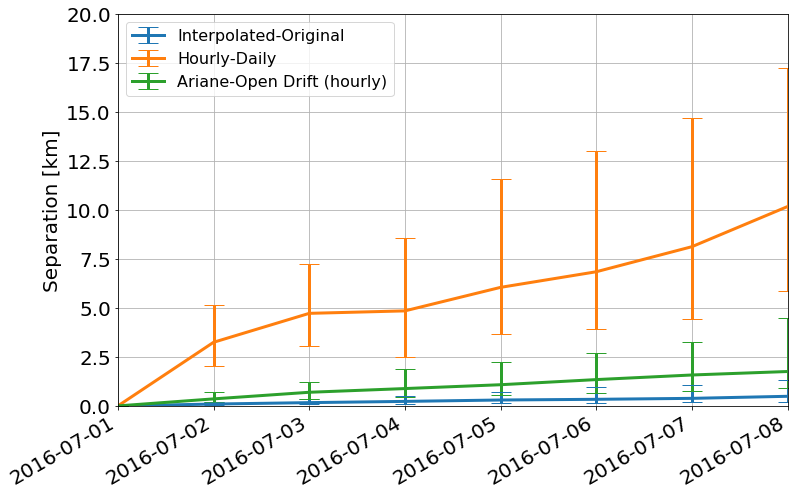

In [14]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_ylabel('Separation [km]', fontsize=20)
for dist, label in zip([dist_CAC, dist_HD, dist_AO], ['Interpolated-Original', 'Hourly-Daily', 'Ariane-Open Drift (hourly)']):
    median = np.nanmedian(np.ma.filled(dist,np.nan), axis=0)
    upper = np.nanquantile(np.ma.filled(dist,np.nan), 0.75, axis=0)
    lower = np.nanquantile(np.ma.filled(dist,np.nan), 0.25, axis=0)
    ax.errorbar(dates, median, yerr=[median-lower, upper-median], label=label, capsize=10,lw=3)
ax.set_xlim([datetime.datetime(2016,7,1), datetime.datetime(2016,7,8)])   
ax.set_ylim([0,20])
ax.grid()

ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=20)
fig.autofmt_xdate()
fig.savefig('figures/summary_errorbars_zoom.png',bbox_inches='tight')

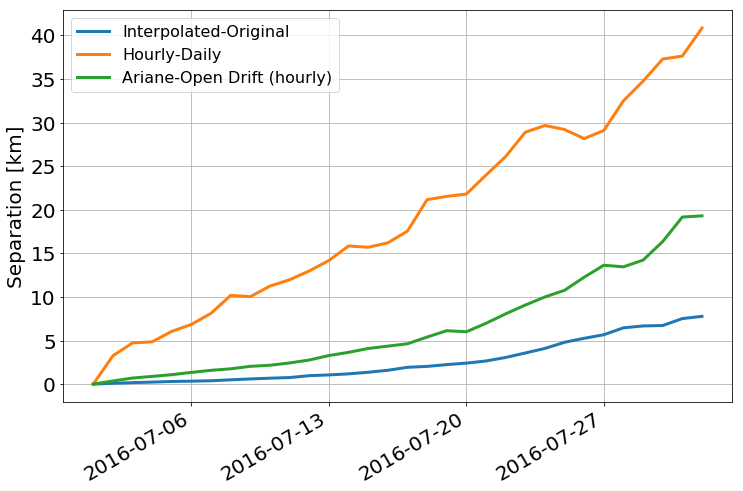

In [15]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_ylabel('Separation [km]', fontsize=20)
for dist, label in zip([dist_CAC, dist_HD, dist_AO], ['Interpolated-Original', 'Hourly-Daily', 'Ariane-Open Drift (hourly)']):
    median = np.nanmedian(np.ma.filled(dist,np.nan), axis=0)
    upper = np.nanquantile(np.ma.filled(dist,np.nan), 0.75, axis=0)
    lower = np.nanquantile(np.ma.filled(dist,np.nan), 0.25, axis=0)
    ax.plot(dates,median,lw=3, label=label)
    #ax.errorbar(dates, median, yerr=[median-lower, upper-median], label=label, capsize=10)
    
ax.grid()

ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=20)
fig.autofmt_xdate()
fig.savefig('figures/summary.png',bbox_inches='tight')

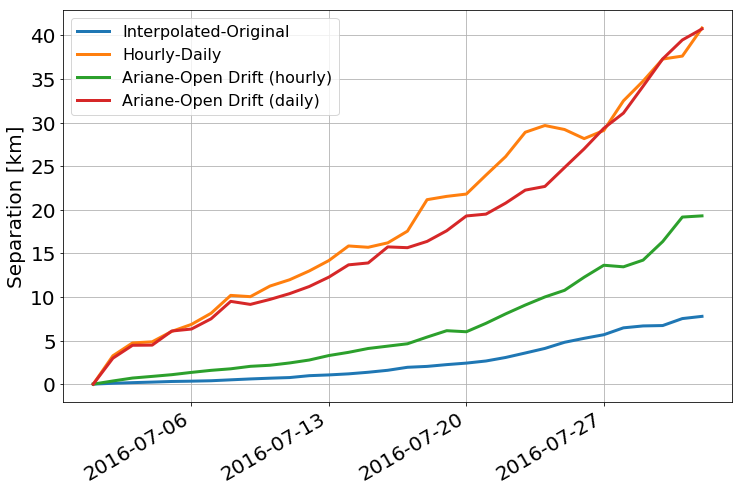

In [16]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_ylabel('Separation [km]', fontsize=20)
for dist, label in zip([dist_CAC, dist_HD, dist_AO, dist_AO_daily], 
                       ['Interpolated-Original', 'Hourly-Daily', 'Ariane-Open Drift (hourly)', 'Ariane-Open Drift (daily)']):
    median = np.nanmedian(np.ma.filled(dist,np.nan), axis=0)
    upper = np.nanquantile(np.ma.filled(dist,np.nan), 0.75, axis=0)
    lower = np.nanquantile(np.ma.filled(dist,np.nan), 0.25, axis=0)
    ax.plot(dates,median,lw=3, label=label)
    #ax.errorbar(dates, median, yerr=[median-lower, upper-median], label=label, capsize=10)
    
ax.grid()

ax.legend(fontsize=16)
ax.tick_params(axis='both', labelsize=20)
fig.autofmt_xdate()
fig.savefig('figures/summary_all.png',bbox_inches='tight')